# 综合题(选做)

任务要求：白葡萄酒质量共分为7个等级，对白葡萄酒质量进行预测。
1. 使用精度作为评价指标。
2. 使用一元线性回归、多元线性回归、对数线性回归等线性回归模型对葡萄酒质量进行预测，计算其十折交叉验证的精度。
3. 使用对数几率回归、线性判别分析对葡萄酒质量进行预测，计算其十折交叉验证的精度。
4. 对比不同模型的预测能力。

## 读取数据

In [4]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

data = np.recfromcsv('data/wine_quality/winequality-white.csv', delimiter=";")
data = np.asarray([list(x) for x in data])

In [7]:
import random




定义函数。
特征归一化函数
特征去均值函数
特征正则化函数


In [5]:

def min_feature(x):
    return MinMaxScaler().fit_transform(x)


def standard_feature(x):
    return StandardScaler().fit_transform(x)


def eval(y_true, y_pred):
    acc = accuracy_score(y_true,y_pred)
    ab_error = mean_absolute_error(y_true, y_pred)
    squ_error = mean_squared_error(y_true, y_pred) ** 0.5
    recall = recall_score(y_true, y_pred,average='micro')
    precision = precision_score(y_true, y_pred,average='micro')
    f1 = f1_score(y_true, y_pred,average='micro')
    return acc, recall, precision, f1, ab_error, squ_error


modellist遍历训练模型 横坐标代表5个模型的其中一个，纵坐标为评价指标的数值


0.44875459371171905 0.44875459371171905 0.44875459371171905 0.44875459371171905 0.6304614128215599 0.893924870530357
0.4554920375663536 0.4554920375663536 0.4554920375663536 0.4554920375663536 0.6218864842792977 0.8881967270194805


H:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
H:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
H:\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
H:\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
H:\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
H:\anaconda\lib\site-packages\sklearn\discriminant_ana

0.523274806043283 0.523274806043283 0.523274806043283 0.523274806043283 0.5408329930583912 0.8244180792880037
0.5212331563903634 0.5212331563903634 0.5212331563903634 0.5212331563903634 0.5414454879542671 0.8255317402405244


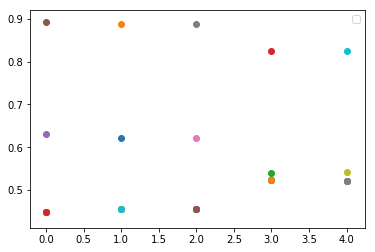

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
model_list = [LinearRegression(), LinearRegression(), LinearRegression(), LogisticRegression(),
              LinearDiscriminantAnalysis()]
axis_x=[i for i in range(6)]

for i, m in enumerate(model_list):
    data_x = data[:, :data.shape[1] - 1]
    data_y = data[:, data.shape[1] - 1]
    if i == 0:
        offset = random.randint(0, data.shape[1] - 2)
        data_x = data_x[:,offset:offset+1]
    if i == 1:
        data_x = data_x[:, 0:random.randint(0, data.shape[1] - 1)]
    if i == 2:
        y_pred = np.exp(cross_val_predict(m, data_x, np.log(data_y), cv=10))
        acc, recall, precision, f1, ab_error, squ_error = eval(y_true=data_y, y_pred=np.round(y_pred))
        for e in  eval_list:
            plt.scatter(i,e )
        continue
    y_pred = cross_val_predict(m, data_x, data_y, cv=10)
    acc, recall, precision, f1, ab_error, squ_error = eval(y_true=data_y, y_pred=np.round(y_pred))
    # print(acc, recall, precision, f1, ab_error, squ_error)
    print(acc, recall, precision, f1, ab_error, squ_error)
    eval_list=[acc, recall, precision, f1, ab_error, squ_error]
    for e in  eval_list:
        plt.scatter(i,e )

plt.legend()

